<a href="https://colab.research.google.com/github/rajusuthar/Hotel-booking-analysis-project/blob/main/Hotel_booking_data_analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!
##This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.
##Explore and analyze the data to discover important factors that govern the bookings

## This data set contains booking information for a city hotel and a resort hotel and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has from the data.


##We will perform exploratory data analysis with python to get insight from the data.

In [1]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# importing package
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# reading the data and displaying data
dir_path='/content/drive/MyDrive/Copy of Hotel Bookings.csv'
hotel_df=pd.read_csv(dir_path)
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


##First copy the dataset, so our original dataset remains unchanged

In [4]:
hotel_df_copy=hotel_df.copy()

##now i am checking how much missing values in each colomn

In [5]:
hotel_df_copy.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
is_canceled                            0
market_segment                         0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
babies                                 0
meal                                   0
reservation_status_date                0
distribution_channel                   0
reservation_status                     0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes 

## In our data set we have missing or null value in our data set so in agent and company because only id is available so i can replace null or missing value with zero 
## i think that if thier is no agent it mean particular customer done his/her booking directly without agent and some with company as well

In [6]:
#replacing the null value of agent and company column
hotel_df_copy[['agent','company']]=hotel_df_copy[['agent','company']].fillna(0)

## lead_time mean is 109 and if try to replace country null value using mean then thier is many country whose lead time is 109 and i think the country which appearing most of time in our data set ,i will use this country to replace  null value of coutry column

In [7]:
#finding which country is occuring most of time 
hotel_df_copy['country'].mode()

0    PRT
dtype: object

## PRT country name is occuring most of the time so i am replacing null value of country column with PRT country

In [8]:
#replacing the null value 
hotel_df_copy['country'].fillna('PRT',inplace=True)

## now we have some null values in children column so i will replace this null value with mean of children

In [9]:
children_mean=hotel_df_copy['children'].mean()
hotel_df_copy['children'].fillna(children_mean,inplace=True)

In [10]:
# now let look on our dataset
hotel_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

##Thier are some column like children ,agent,company whose containing integer value but thier type is float so lets convert these data type into integer

In [11]:
# type conversion from float to int
hotel_df_copy[['agent','company','children']]=hotel_df_copy[['agent','company','children']].astype('int64')

In [12]:
hotel_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  int64  
 11  babies                          119390 non-null  int64  
 12  meal            

##Thier are some rows in which total customer (babies +adult+chiledren ) is zero so it mean there is no customer so lets drop this row 

In [13]:
# droping the row in which thier number of customer is zero
hotel_df_copy=hotel_df_copy.drop(hotel_df_copy[(hotel_df_copy.children+hotel_df_copy.adults+hotel_df_copy.babies)==0].index)

In [14]:
def convert_month_to_int(str):
  '''
  This funtion take month name (like march) as argument and return month number (like for march its 3)
  '''
  from time import strptime
  month_name=str
  month_num=strptime(month_name,'%B').tm_mon
  return month_num

In [15]:
# adding new column month number in dataframe
hotel_df_copy['month_number']=hotel_df_copy['arrival_date_month'].apply(convert_month_to_int)

## Thier are two hotel one is resort hotel and another one is city so let split our data in resort and city hotel and will do same analysis for both resort and city hotels 

In [16]:
#creating dataframe for both city and resort hotel 
resort_hotel_df=hotel_df_copy[hotel_df_copy['hotel']=='Resort Hotel']
city_hotel_df=hotel_df_copy[hotel_df_copy['hotel']=='City Hotel']

In [17]:
# creating data frame for both hotel in which guest not canceled thier booking 
Not_canceled_city_hotel_dataframe=city_hotel_df[city_hotel_df['is_canceled']==0]
Not_canceled_resort_hotel_dataframe=resort_hotel_df[resort_hotel_df['is_canceled']==0]

# creating a data frame of city and resort hotel guest who not canceled thier booking
canceled_city_hotel_dataframe=city_hotel_df[city_hotel_df['is_canceled']==1]
canceled_resort_hotel_dataframe=resort_hotel_df[resort_hotel_df['is_canceled']==1]

##i will analysing the data seperately for resort and city hotel because it will give us clear picture about resort and city hotel individually

In [18]:
#these are top ten country for resort hotel 
resort_hotel_df['country'].value_counts().reset_index().head(10)

,index,country
0,PRT,18084
1,GBR,6813
2,ESP,3956
3,IRL,2166
4,FRA,1610
5,DEU,1203
6,CN,710
7,NLD,514
8,USA,479
9,ITA,459


In [19]:
#these are top ten country for city hotel 
city_hotel_df['country'].value_counts().reset_index().head(10)

,index,country
0,PRT,30877
1,FRA,8791
2,DEU,6082
3,GBR,5307
4,ESP,4604
5,ITA,3302
6,BEL,1894
7,BRA,1792
8,USA,1614
9,NLD,1589


## these are  the top country in out dataset which is containing our most of the data

In [22]:
#creating new data frame which is containing only top 10 country of city hotel
top_country_city_hotel_df=city_hotel_df[(city_hotel_df['country']=='PRT') | (city_hotel_df['country']=='FRA') | (city_hotel_df['country']=='DEU') | (city_hotel_df['country']=='GBR') | (city_hotel_df['country']=='ESP') | (city_hotel_df['country']=='ITA') | (city_hotel_df['country']=='BEL') | (city_hotel_df['country']=='BRA') | (city_hotel_df['country']=='USA') | (city_hotel_df['country']=='NLD')]


In [23]:
#creating new data frame which is containing only top 10 country of city hotel
top_country_resort_hotel_df=resort_hotel_df[(resort_hotel_df['country']=='PRT') | (resort_hotel_df['country']=='FRA') | (resort_hotel_df['country']=='DEU') | (resort_hotel_df['country']=='GBR') | (resort_hotel_df['country']=='ESP') | (resort_hotel_df['country']=='ITA') | (resort_hotel_df['country']=='BEL') | (resort_hotel_df['country']=='BRA') | (resort_hotel_df['country']=='USA') | (resort_hotel_df['country']=='NLD')]


## analysis 1:- so lets look in our data and to find from which country most guest come to book hotels

In [24]:
# guest who not cancelled the booking in city hotel 
Not_canceled_top_city_hotel_df=top_country_city_hotel_df[top_country_city_hotel_df['is_canceled']==0]
# counting the number of guest in each country 
city_hotel_guest_count=Not_canceled_top_city_hotel_df['country'].value_counts().reset_index()


In [25]:
#renaming the column name
city_hotel_guest_count.rename(columns={'index':'country','country':'number of guest in city hotel'},inplace=True)
# replacing index with country
city_hotel_guest_count.set_index('country',inplace=True)
# sorting value by index(country)
city_hotel_guest_count.sort_index(inplace=True)

In [26]:
# guest who not cancelled the booking 
Not_canceled_top_resort_hotel_df=top_country_resort_hotel_df[top_country_resort_hotel_df['is_canceled']==0]
# counting the number of guest in each country 
resort_hotel_guest_count=Not_canceled_top_resort_hotel_df['country'].value_counts().reset_index()

In [27]:
#renaming the column name
resort_hotel_guest_count.rename(columns={'index':'country','country':'number of guest in resort hotel'},inplace=True)
# replacing index with country
resort_hotel_guest_count.set_index('country',inplace=True)
# sorting value by index(country)
resort_hotel_guest_count.sort_index(inplace=True)

In [29]:
# concanting resort and city hotel
city_and_resort_hotel_guest_df=pd.concat([city_hotel_guest_count,resort_hotel_guest_count],axis=1)
#sorting the data set
city_and_resort_hotel_guest_df.sort_values('number of guest in city hotel',ascending=False,inplace=True)

Text(0, 0.5, 'number of guest')

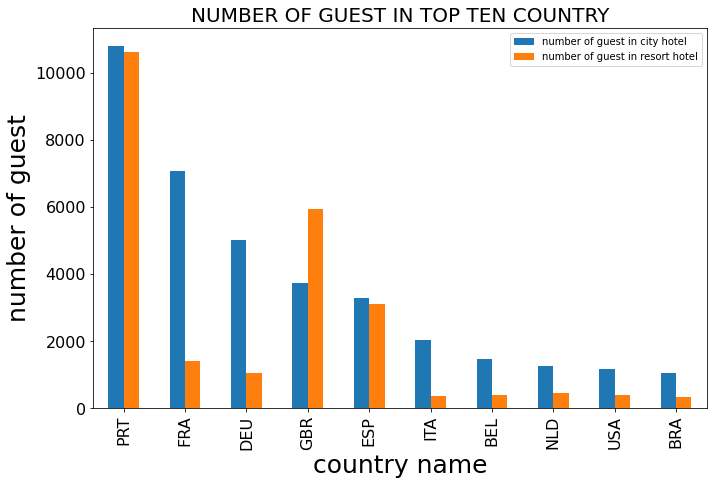

In [30]:
ax=city_and_resort_hotel_guest_df.plot.bar(figsize=(11,7),fontsize=16)
# setting title
ax.set_title('NUMBER OF GUEST IN TOP TEN COUNTRY',fontsize=20)
ax.set_xlabel('country name',fontsize=25)
ax.set_ylabel('number of guest',fontsize=25)

## its clearly visiable that most of the guest come from top five country PRT,FRA,DEU,GBR,ESP.
##and also one more things that compare to resort hotel most of the guest preffered city hotel ,,

## Thier is one country GBR (united kingdom) madeup of England,scotland Wales and northern ireland guest prefered resort hotel not city hotel 

## analysis 2:- lets look how booking in city and resort hotel by month of year , for simplicity i am analysing the completed data and try to find out number of booking in each month of year for city and resort hotels